In [4]:
import numpy as np
import os
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
def get_pixels(image_path):
    # Returns an array of pixel values (0, 100, 255) with same dimensions as image
    image = Image.open(image_path, "r")
    height, width = image.size
    pixels = list(image.getdata()) # Gets a list of image's pixel values
    pixels = np.array(pixels).reshape((width, height)) # Reshapes list of pixel values into hard-coded width x height arrray
    return pixels

def get_total_pixels(image_path):
    image = Image.open(image_path, "r")
    height, width = image.size
    return width * height

In [41]:
# Outputs an array where each entry contains
# file name, % of cloud pixels, % of sky pixels, % of undefined pixels
# Basically, it finds pixel distribution for each image (in case we want to do anything further with the images)

# Set directory of images
directory = "datasets/wsiseg"

# total_pixels = 216000 # for WSISEG
output = []

for file in os.listdir(directory):
    line = []
    line.append(file)
    
    cloud = 0 # 255
    sky = 0 # 100 for WSISEG, 0 for HYTA
    undefined = 0 # 0 for WSISEG, thin cloud = 126 for HYTA
    
    image_path = directory + "/" + file
    image_array = get_pixels(image_path)
    total_pixels = get_total_pixels(image_path)
    
    for row in image_array:
        for pixel in row:
            if pixel == 0:
                undefined += 1
            elif pixel == 255:
                cloud += 1
            else:
                sky += 1

    line.append(cloud/total_pixels)
    line.append(sky/total_pixels)
    line.append(undefined/total_pixels)
    output.append(line)

/Users/jenny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


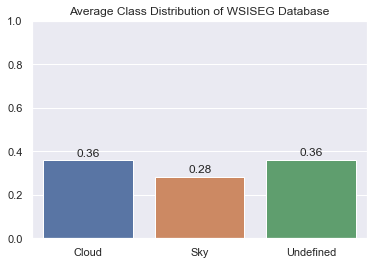

In [40]:
# Find average of pixel distributions
cloud_sum = 0
sky_sum = 0
undefined_sum = 0

for line in output:
    cloud_sum += line[1]
    sky_sum += line[2]
    undefined_sum += line[3]

cloud_ave = cloud_sum/len(output)
sky_ave = sky_sum/len(output)
undefined_ave = undefined_sum/len(output)

classes = ["Cloud", "Sky", "Undefined"]
averages = [cloud_ave, sky_ave, undefined_ave]

# Bar chart of averages with Matplotlib and Seaborn
sns.set(style="darkgrid")
sns.barplot(classes, averages)
plt.title("Average Class Distribution of WSISEG Database")
plt.ylim(0,1)
for index, value in enumerate(averages):
    plt.text(index - 0.1, value + 0.02, str(round(value, 2)))
plt.show()

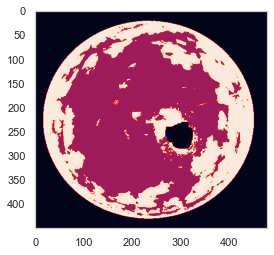

In [122]:
# Example of image
sns.set_style("whitegrid", {'axes.grid' : False})
plt.imshow(image)